In [15]:
import pandas as pd
from pandas import Series, DataFrame
import scipy as sp
import numpy as np

import matplotlib.pyplot as pltd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

# 2.1 時系列データの観察

In [60]:
df = pd.read_csv('sample/Price4.csv', index_col=0)
df

,x5202,x7272,x4927,x4502
1,55,682,2460,3595
2,56,672,2543,3575
3,56,668,2544,3570
4,57,674,2500,3500
5,60,711,2535,3545
6,62,726,2522,3550
7,61,743,2541,3580
8,59,738,2480,3525
9,58,730,2464,3530
10,60,734,2430,3535


In [25]:
mpl.rcParams['font.family'] = 'YuGothic'

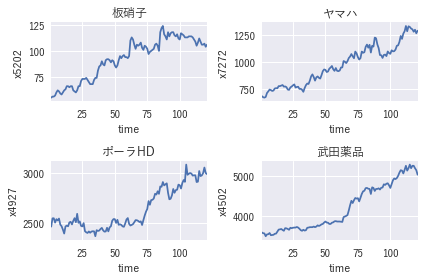

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df['x5202'].plot(ax=axes[0,0]); axes[0,0].set_title('板硝子')
axes[0,0].set_xlabel('time'); axes[0,0].set_ylabel('x5202')
df['x7272'].plot(ax=axes[0,1]); axes[0,1].set_title('ヤマハ')
axes[0,1].set_xlabel('time'); axes[0,1].set_ylabel('x7272')
df['x4927'].plot(ax=axes[1,0]); axes[1,0].set_title('ポーラHD')
axes[1,0].set_xlabel('time'); axes[1,0].set_ylabel('x4927')
df['x4502'].plot(ax=axes[1,1]); axes[1,1].set_title('武田薬品')
axes[1,1].set_xlabel('time'); axes[1,1].set_ylabel('x4502')
plt.tight_layout()

In [44]:
df_div = df.apply(lambda x: x/x.iloc[0])
df_div

,x5202,x7272,x4927,x4502
1,1.000000,1.000000,1.000000,1.000000
2,1.018182,0.985337,1.033740,0.994437
3,1.018182,0.979472,1.034146,0.993046
4,1.036364,0.988270,1.016260,0.973574
5,1.090909,1.042522,1.030488,0.986092
6,1.127273,1.064516,1.025203,0.987483
7,1.109091,1.089443,1.032927,0.995828
8,1.072727,1.082111,1.008130,0.980529
9,1.054545,1.070381,1.001626,0.981919
10,1.090909,1.076246,0.987805,0.983310


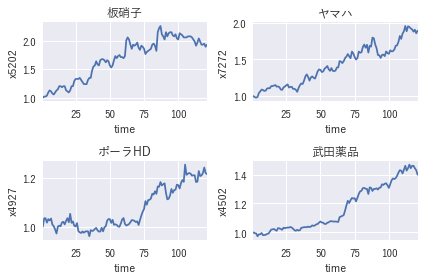

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df_div['x5202'].plot(ax=axes[0,0]); axes[0,0].set_title('板硝子')
axes[0,0].set_xlabel('time'); axes[0,0].set_ylabel('x5202')
df_div['x7272'].plot(ax=axes[0,1]); axes[0,1].set_title('ヤマハ')
axes[0,1].set_xlabel('time'); axes[0,1].set_ylabel('x7272')
df_div['x4927'].plot(ax=axes[1,0]); axes[1,0].set_title('ポーラHD')
axes[1,0].set_xlabel('time'); axes[1,0].set_ylabel('x4927')
df_div['x4502'].plot(ax=axes[1,1]); axes[1,1].set_title('武田薬品')
axes[1,1].set_xlabel('time'); axes[1,1].set_ylabel('x4502')
plt.tight_layout()

In [65]:
df2 = df[:len(df.index)-1].apply(lambda x: np.log(x)*100)
df3 = df[1:].apply(lambda x: np.log(x)*100)
df3.index = df2.index
df_rate  = df3.sub(df2)
df_rate

,x5202,x7272,x4927,x4502
1,1.801851,-1.477132,3.318314,-0.557882
2,0.000000,-0.597017,0.039316,-0.139958
3,1.769958,0.894194,-1.744691,-1.980263
4,5.129329,5.344232,1.390291,1.277519
5,3.278982,2.087759,-0.514140,0.140944
6,-1.626052,2.314603,0.750547,0.841520
7,-3.333642,-0.675222,-2.429914,-1.548236
8,-1.709443,-1.089929,-0.647251,0.141743
9,3.390155,0.546449,-1.389479,0.141543
10,3.278982,2.555620,-1.659789,0.704725


In [73]:
ymin = min(df_rate.min())
ymax = max(df_rate.max())

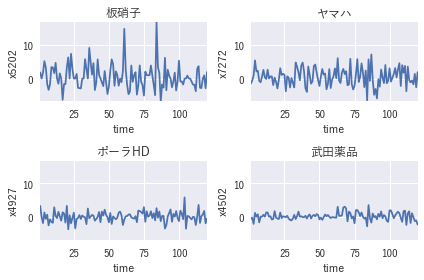

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df_rate['x5202'].plot(ax=axes[0,0]); axes[0,0].set_title('板硝子')
axes[0,0].set_xlabel('time'); axes[0,0].set_ylabel('x5202'); axes[0,0].set_ylim(ymin,ymax)
df_rate['x7272'].plot(ax=axes[0,1]); axes[0,1].set_title('ヤマハ')
axes[0,1].set_xlabel('time'); axes[0,1].set_ylabel('x7272'); axes[0,1].set_ylim(ymin,ymax)
df_rate['x4927'].plot(ax=axes[1,0]); axes[1,0].set_title('ポーラHD')
axes[1,0].set_xlabel('time'); axes[1,0].set_ylabel('x4927'); axes[1,0].set_ylim(ymin,ymax)
df_rate['x4502'].plot(ax=axes[1,1]); axes[1,1].set_title('武田薬品')
axes[1,1].set_xlabel('time'); axes[1,1].set_ylabel('x4502'); axes[1,1].set_ylim(ymin,ymax)
#plt.ylim(min(df_rate.min()), max(df_rate.max()))
plt.tight_layout()

# 2.2 時系列データの分布と要約

In [95]:
means4 =df_rate.mean()
df_mean4 = pd.DataFrame(means4).T
df_mean4.index = ["平均(%)"]
df_mean4.columns = ["板硝子", "ヤマハ", "ポーラHD", "武田薬品"]
df_mean4

,板硝子,ヤマハ,ポーラHD,武田薬品
平均(%),0.546755,0.53114,0.162315,0.279897


In [99]:
std4 = df_rate.std()
df_std4 = pd.DataFrame(std4).T
df_std4.index = ["volatility(%)"]
df_std4.columns = ["板硝子", "ヤマハ", "ポーラHD", "武田薬品"]
df_std4

,板硝子,ヤマハ,ポーラHD,武田薬品
volatility(%),3.565816,2.638556,1.546933,1.133956


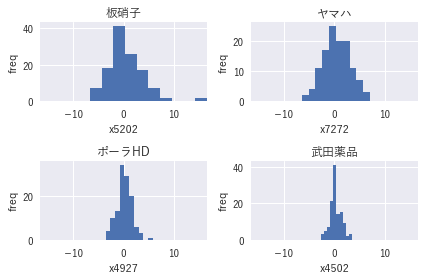

In [168]:
abs_max = max(np.absolute(ymin), np.absolute(ymax))
xmin = -abs_max ; xmax = abs_max
fig, axes = plt.subplots(nrows=2, ncols=2)
df_rate['x5202'].hist(ax=axes[0,0]); axes[0,0].set_title('板硝子')
axes[0,0].set_xlabel('x5202'); axes[0,0].set_ylabel('freq'); axes[0,0].set_xlim(xmin,xmax)
df_rate['x7272'].hist(ax=axes[0,1]); axes[0,1].set_title('ヤマハ')
axes[0,1].set_xlabel('x7272'); axes[0,1].set_ylabel('freq'); axes[0,1].set_xlim(xmin,xmax)
df_rate['x4927'].hist(ax=axes[1,0]); axes[1,0].set_title('ポーラHD')
axes[1,0].set_xlabel('x4927'); axes[1,0].set_ylabel('freq'); axes[1,0].set_xlim(xmin,xmax)
df_rate['x4502'].hist(ax=axes[1,1]); axes[1,1].set_title('武田薬品')
axes[1,1].set_xlabel('x4502'); axes[1,1].set_ylabel('freq'); axes[1,1].set_xlim(xmin,xmax)
#plt.ylim(min(df_rate.min()), max(df_rate.max()))
plt.tight_layout()

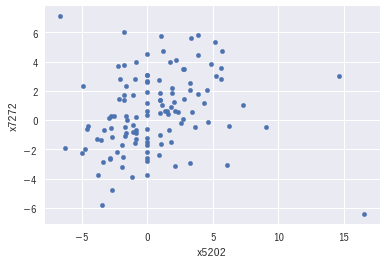

In [105]:
df_rate.plot.scatter(x='x5202', y='x7272')

In [106]:
df_rate.corr()

,x5202,x7272,x4927,x4502
x5202,1.000000,0.179624,0.004770,0.060213
x7272,0.179624,1.000000,0.072823,0.414600
x4927,0.004770,0.072823,1.000000,0.175989
x4502,0.060213,0.414600,0.175989,1.000000


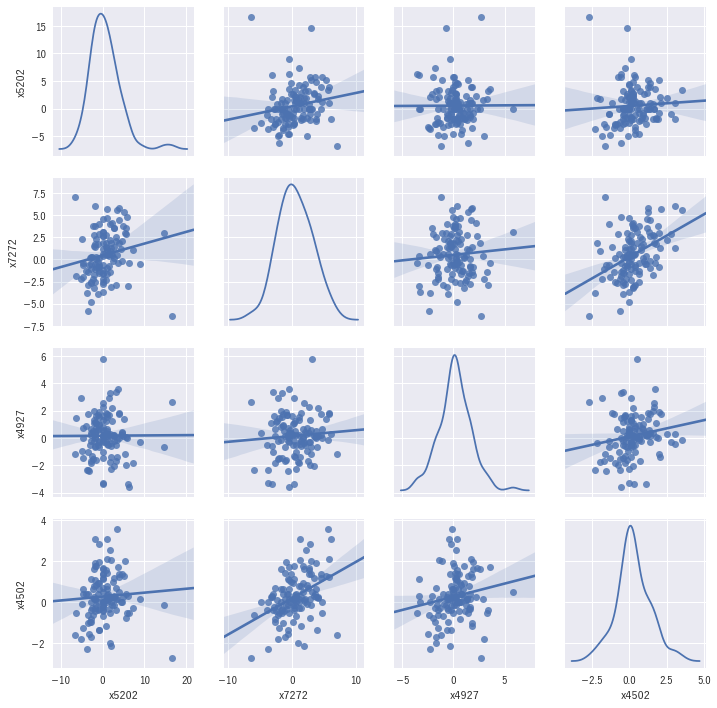

In [114]:
#pd.tools.plotting.scatter_matrix(df_rate)
sns.pairplot(df_rate, diag_kind='kde', kind="reg")

# 2.3 統計的仮説検定について

## 正規分布に従っているか確認(Shapiro-Wilkの検定)

In [119]:
d_name_code = {"x5202":"板硝子", "x7272":"ヤマハ", "x4927":"ポーラHD", "x4502":"武田薬品"}
for series in df_rate:
    print(d_name_code[series], sp.stats.shapiro(df_rate[series]))

板硝子 (0.9240832328796387, 4.189378159935586e-06)
ヤマハ (0.9949772357940674, 0.9483349919319153)
ポーラHD (0.9832317233085632, 0.14187775552272797)
武田薬品 (0.9846038818359375, 0.18925489485263824)


## 連の検定

In [128]:
import statsmodels.sandbox.stats.runs as runs

In [138]:
df_bin = df_rate.apply(lambda x:  x < x.mean() )
df_bin

,x5202,x7272,x4927,x4502
1,False,True,False,True
2,True,True,True,True
3,False,False,True,True
4,False,False,False,False
5,False,False,True,True
6,True,False,False,False
7,True,True,True,True
8,True,True,True,True
9,False,False,True,True
10,False,False,True,False


In [139]:
d_name_code = {"x5202":"板硝子", "x7272":"ヤマハ", "x4927":"ポーラHD", "x4502":"武田薬品"}
for series in df_bin:
    result = runs.runstest_1samp(df_bin[series])
    print(d_name_code[series],result)
#    print(d_name_code[series], runs(df_rate[series]).runs_test())

板硝子 (-1.2654003546842241, 0.20572784813907452)
ヤマハ (0.0031349222323460548, 0.99749869804851721)
ポーラHD (1.7500528446471568, 0.080109195560318425)
武田薬品 (0.087153689416792926, 0.93054934971556258)


## 2.4 時間依存性の発見

In [142]:
x_price = pd.read_csv('sample/x_price.csv', index_col=0)
x_return = pd.read_csv('sample/x_return.csv', index_col=0)
y_price = pd.read_csv('sample/y_price.csv', index_col=0)
y_return = pd.read_csv('sample/y_return.csv', index_col=0)

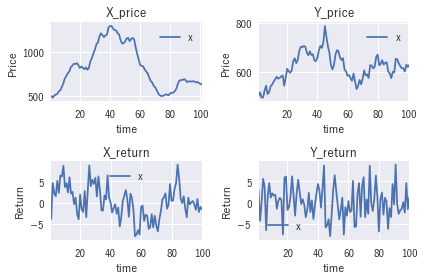

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=2)
x_price.plot(ax=axes[0,0]); axes[0,0].set_title('X_price')
axes[0,0].set_xlabel('time'); axes[0,0].set_ylabel('Price')
y_price.plot(ax=axes[0,1]); axes[0,1].set_title('Y_price')
axes[0,1].set_xlabel('time'); axes[0,1].set_ylabel('Price')
x_return.plot(ax=axes[1,0]); axes[1,0].set_title('X_return')
axes[1,0].set_xlabel('time'); axes[1,0].set_ylabel('Return')
y_return.plot(ax=axes[1,1]); axes[1,1].set_title('Y_return')
axes[1,1].set_xlabel('time'); axes[1,1].set_ylabel('Return')
#plt.ylim(min(df_rate.min()), max(df_rate.max()))
plt.tight_layout()

In [161]:
type(x_return.mean())
x_summary = DataFrame(pd.concat([x_return.mean(), x_return.std()]))
x_summary.index = ['mean', 'std']
x_summary.columns = ['x']
y_summary = DataFrame(pd.concat([y_return.mean(), y_return.std()]))
y_summary.index = ['mean', 'std']
y_summary.columns = ['y']
summary = pd.concat([x_summary, y_summary], axis=1)
summary

,x,y
mean,0.228029,0.228029
std,3.784666,3.784666


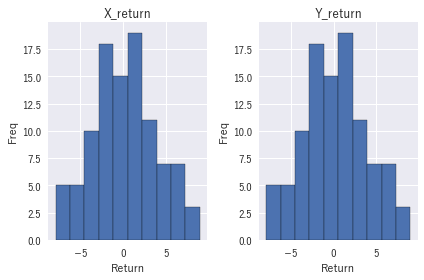

In [171]:
fig, axes = plt.subplots(nrows=1, ncols=2)
x_return.hist(ax=axes[0],histtype='bar', ec='black'); axes[0].set_title('X_return')
axes[0].set_xlabel('Return'); axes[0].set_ylabel('Freq')
y_return.hist(ax=axes[1],histtype='bar', ec='black'); axes[1].set_title('Y_return')
axes[1].set_xlabel('Return'); axes[1].set_ylabel('Freq')
plt.tight_layout()